In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
qdf = pd.read_csv('/content/drive/Shareddrives/QRLSSP 2024/COVID/Python Code/us-counties-2021.csv')
qdf['county'] = qdf['county'].str.lower()
qdf['state'] = qdf['state'].str.lower()
qdf['county_state'] = qdf['county'] + '-' + qdf['state']
print("Total counties including Alaska and Hawaii after concatenating state & county US counites:", len(qdf['county_state'].unique()))
qdf['date'] = pd.to_datetime(qdf['date'], errors='coerce')

qdf = qdf.dropna(subset=['date'])

start_date = '2021-03-01'
end_date = '2021-09-01'

date_filtered_data = qdf[(qdf['date'] >= start_date) & (qdf['date'] <= end_date)]

vdf = pd.read_csv('/content/drive/Shareddrives/QRLSSP 2024/COVID/Python Code/2020 Election Voting by County csv.csv')
vdf = vdf[~vdf['state'].isin(['alaska', 'hawaii'])]
vdf['name'] = vdf['name'].str.lower()
vdf['state'] = vdf['state'].str.lower()
vdf['name_state'] = vdf['name'] + '-' + vdf['state']
vdf['trumpd_votes_ratio'] = vdf['results_trumpd'] / vdf['votes']
print("Total counties including Alaska and Hawaii after concatenating state & county Voting:", len(vdf['name_state'].unique()))

Total counties including Alaska and Hawaii after concatenating state & county US counites: 3262
Total counties including Alaska and Hawaii after concatenating state & county Voting: 3115


In [ ]:
# Categorize counties into a1 to a5 based on Trump vote ratios
a1, a2, a3, a4, a5 = [], [], [], [], []

for _, row in vdf.iterrows():
    county = row['fips']
    ratio = row['trumpd_votes_ratio']
    if ratio <= 0.25:
        a1.append(county)
    elif 0.25 <= ratio < 0.45:
        a2.append(county)
    elif 0.45 <= ratio < 0.55:
        a3.append(county)
    elif 0.55 <= ratio < 0.75:
        a4.append(county)
    else:
        a5.append(county)

# Print counts of counties in each category
print("a1:", len(a1))
print("a2:", len(a2))
print("a3:", len(a3))
print("a4:", len(a4))
print("a5:", len(a5))
print("Total Counties:",len(a1)+len(a2)+len(a3)+len(a4)+len(a5))

a1: 62
a2: 355
a3: 330
a4: 1385
a5: 983
Total Counties: 3115


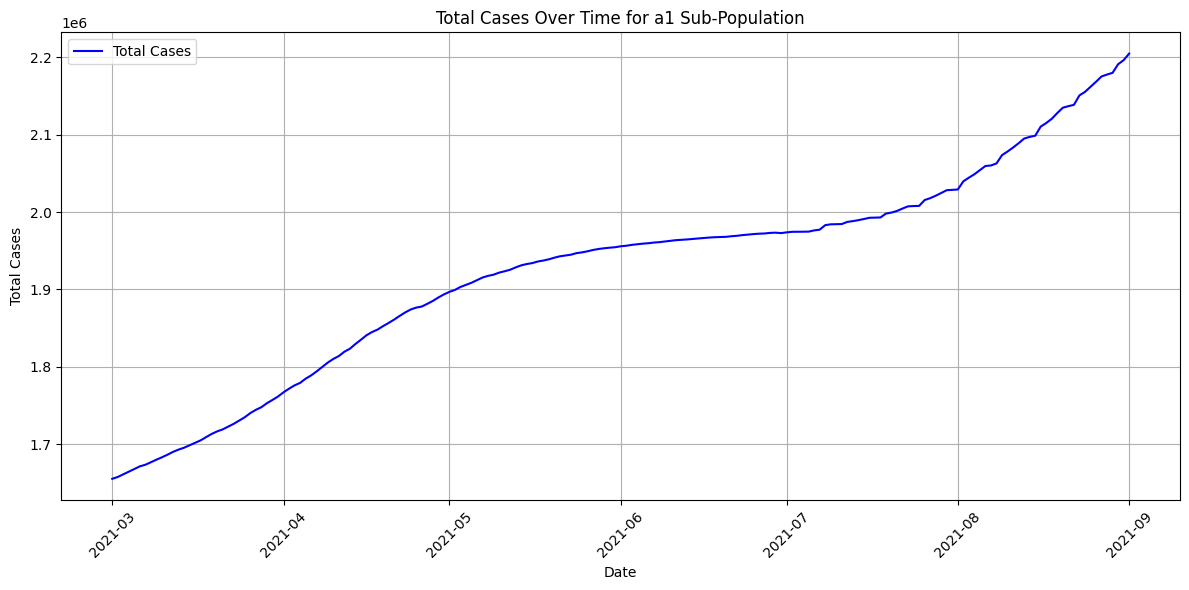

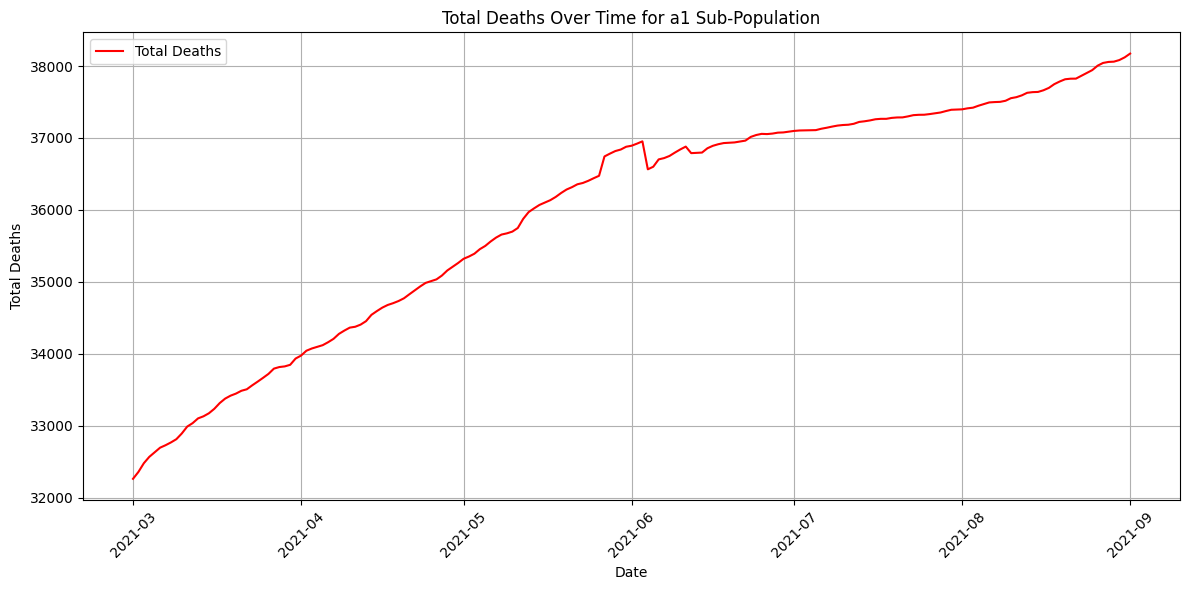

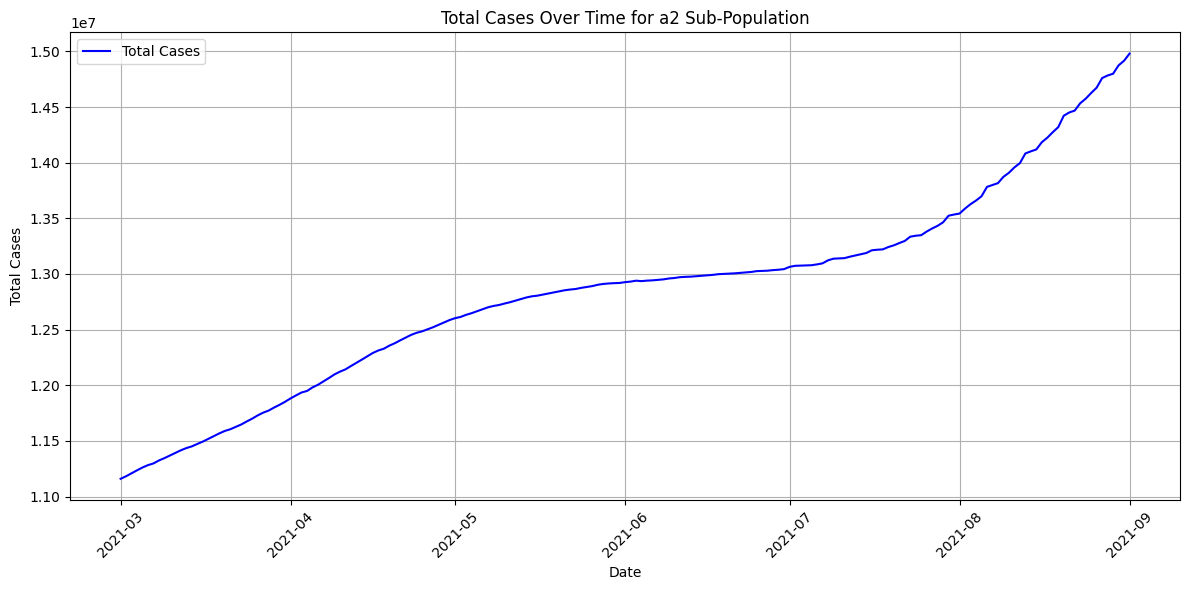

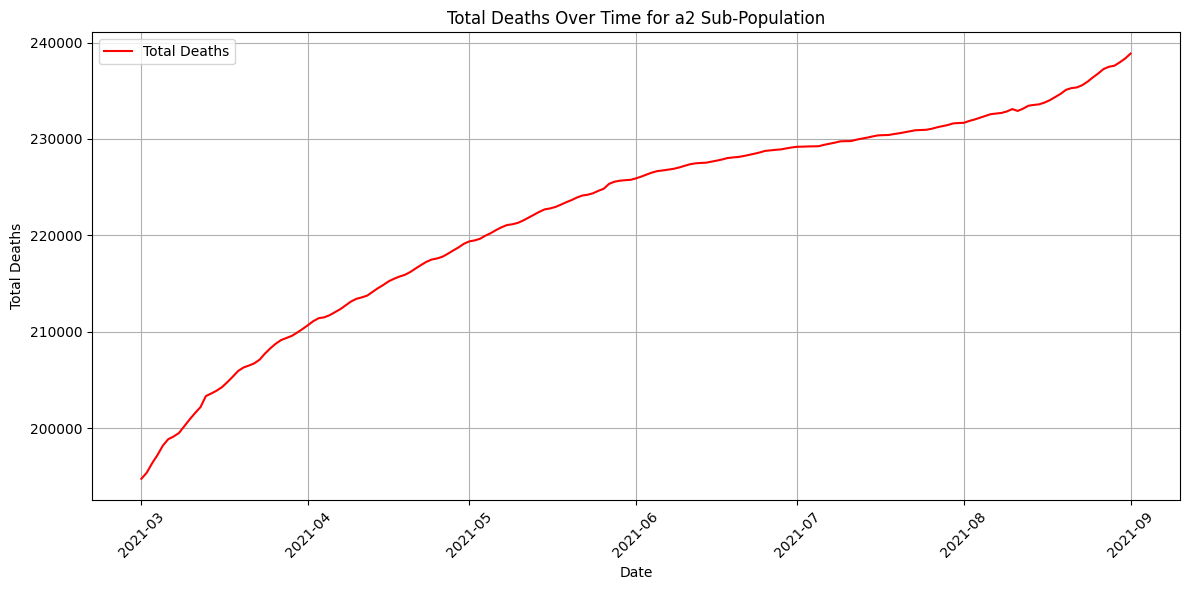

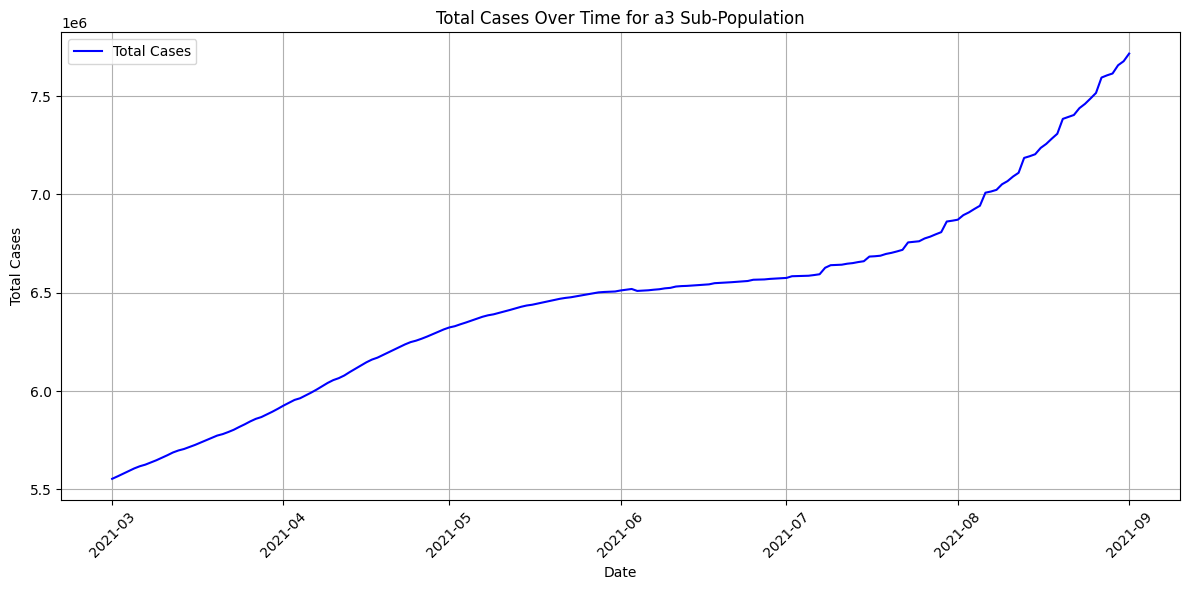

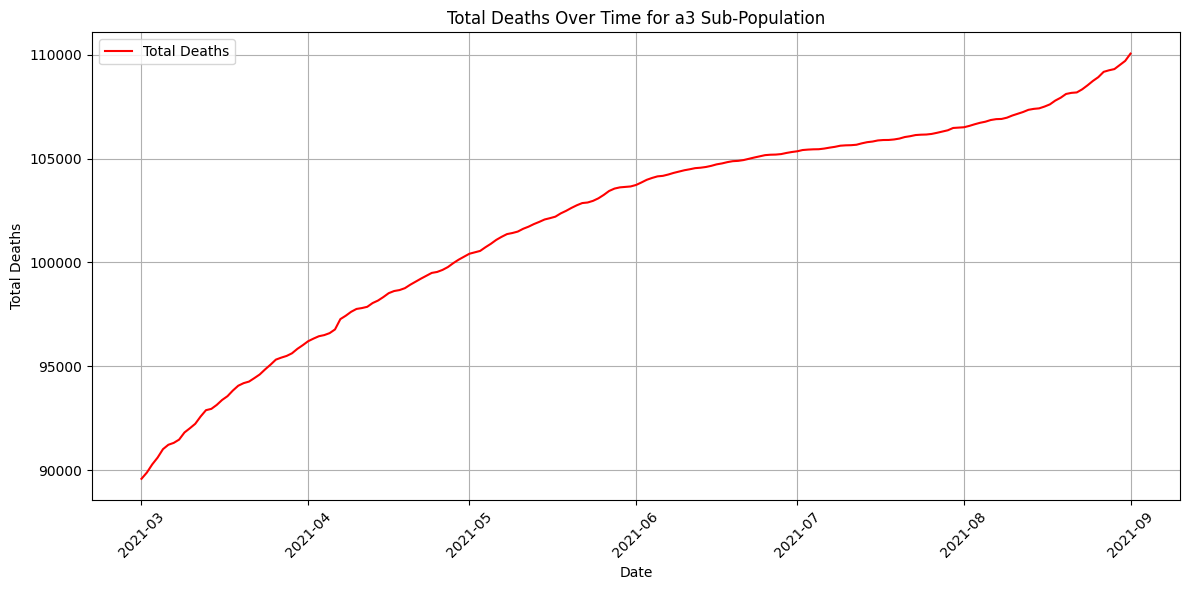

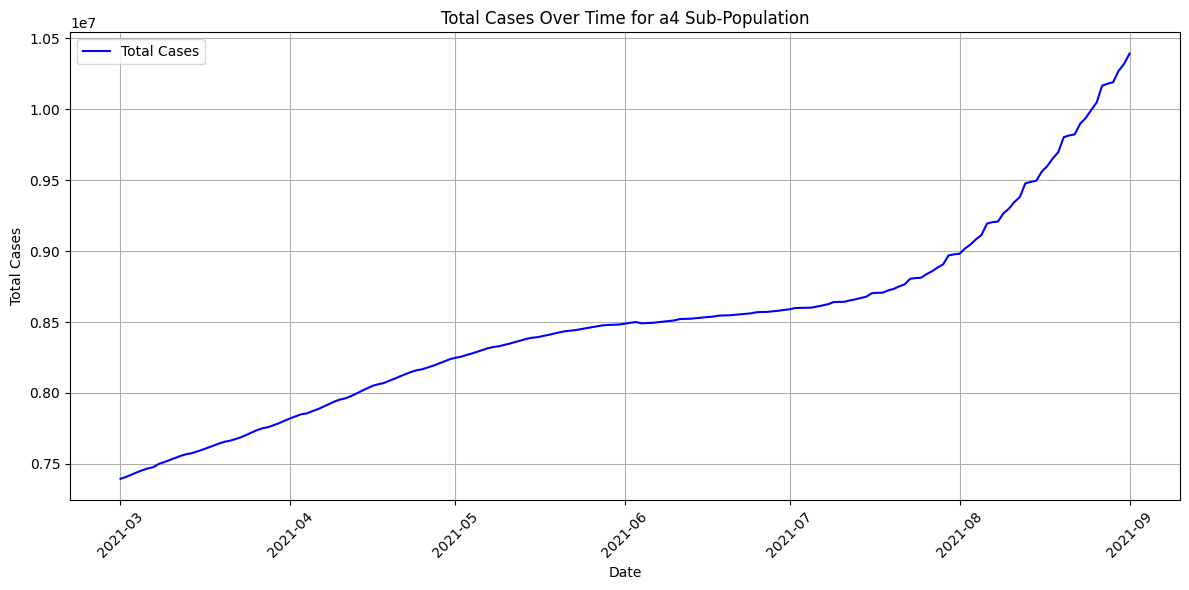

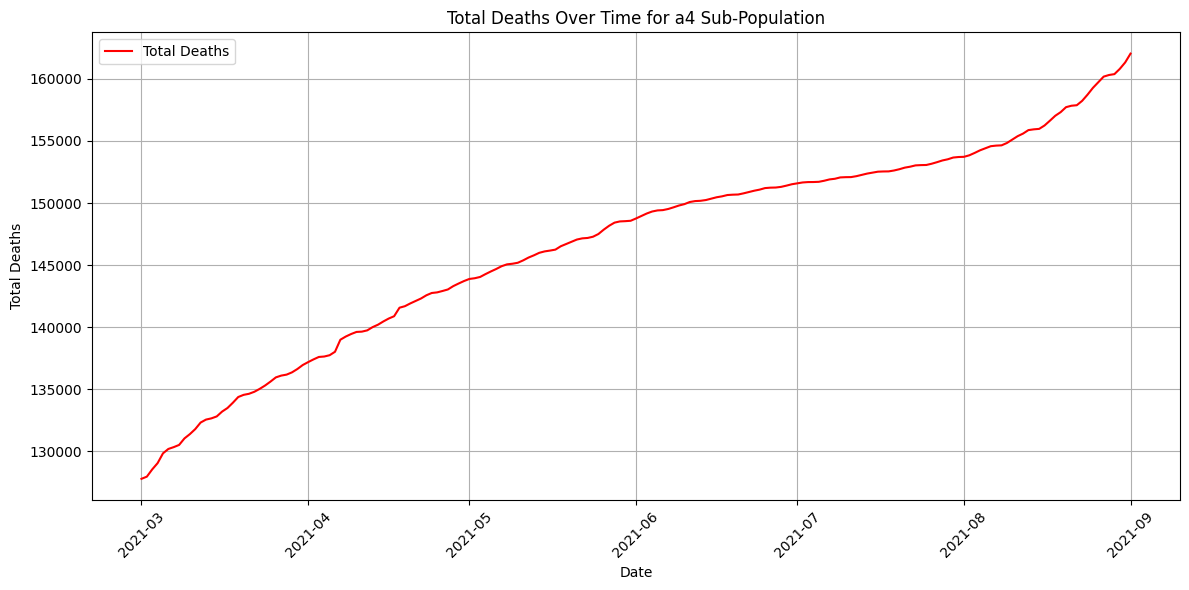

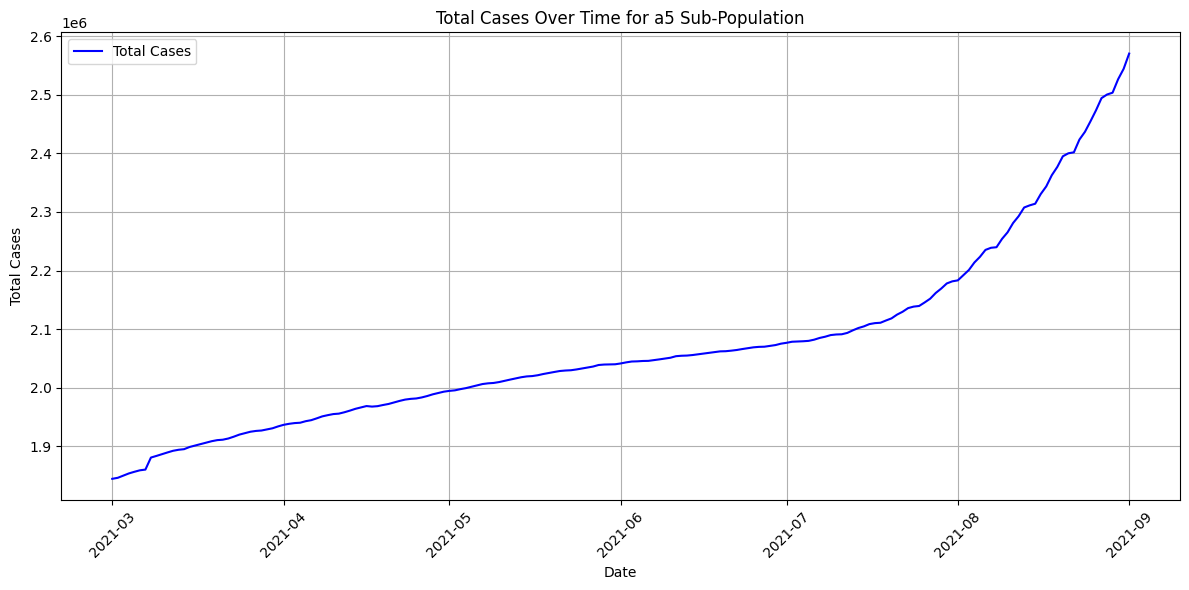

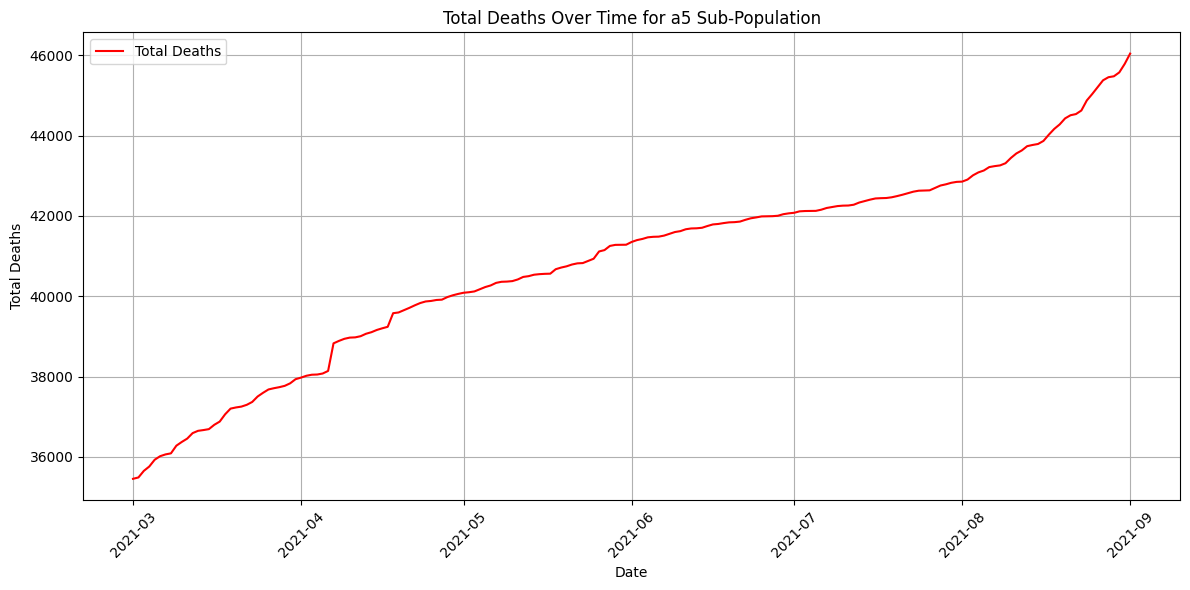

In [ ]:
# Function to plot time series for a category
def plot_category_time_series(category, category_counties):
    # Filter COVID-19 data for counties in the category
    category_data = date_filtered_data[date_filtered_data['fips'].isin(category_counties)]

    # Group by date and aggregate cases and deaths
    category_aggregated = category_data.groupby('date').agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

    # Plot cases over time
    plt.figure(figsize=(12, 6))
    plt.plot(category_aggregated['date'], category_aggregated['cases'], color='blue', label='Total Cases')
    plt.xlabel('Date')
    plt.ylabel('Total Cases')
    plt.title(f'Total Cases Over Time for {category} Sub-Population')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

    # Plot deaths over time
    plt.figure(figsize=(12, 6))
    plt.plot(category_aggregated['date'], category_aggregated['deaths'], color='red', label='Total Deaths')
    plt.xlabel('Date')
    plt.ylabel('Total Deaths')
    plt.title(f'Total Deaths Over Time for {category} Sub-Population')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Plotting for each category
plot_category_time_series('a1', a1)
plot_category_time_series('a2', a2)
plot_category_time_series('a3', a3)
plot_category_time_series('a4', a4)
plot_category_time_series('a5', a5)


In [ ]:
cdf = pd.read_excel('/content/drive/Shareddrives/QRLSSP 2024/COVID/Python Code/filtered_PopulationEstimates.xlsx', skiprows=4)


new_df1 = cdf[~cdf['State'].str.endswith(('AK', 'HI'))].copy()

# Dictionary mapping state abbreviations to full names
state_abbr_to_full = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New-Hampshire', 'NJ': 'New-Jersey', 'NM': 'New-Mexico', 'NY': 'New-York',
    'NC': 'North-Carolina', 'ND': 'North-Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode-Island', 'SC': 'South-Carolina',
    'SD': 'South-Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West-Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Map state abbreviations to full names
new_df1.loc[:, 'State'] = new_df1['State'].map(state_abbr_to_full)

# Drop rows with missing values in 'State' column
new_df1 = new_df1.dropna(subset=['State'])
# Convert to lower case and strip any extra spaces
new_df1.loc[:, 'Area_Name'] = new_df1['Area_Name'].str.lower().str.strip()
new_df1.loc[:, 'State'] = new_df1['State'].str.lower().str.strip()

# Concatenate area name and state with a hyphen
new_df1.loc[:, 'Area_Name_State'] = new_df1['Area_Name'] + '-' + new_df1['State']

print("Total counties excluding Alaska and Hawaii after concatenating state & county Pop US counties:", len(new_df1))

new_df2 = new_df1[['FIPStxt','Area_Name_State', 'POP_ESTIMATE_2021']]
new_df2.head()


Total counties excluding Alaska and Hawaii after concatenating state & county Pop US counties: 3164


,FIPStxt,Area_Name_State,POP_ESTIMATE_2021
1,1000,alabama-alabama,5049846.0
2,1001,autauga-alabama,59210.0
3,1003,baldwin-alabama,239361.0
4,1005,barbour-alabama,24539.0
5,1007,bibb-alabama,22370.0


In [ ]:
len(new_df2)

3164

In [ ]:
# Count unique values of Area_Name_State
unique_count = new_df2['FIPStxt'].nunique()
print("Number of unique Area_Name_State values:", unique_count)

Number of unique Area_Name_State values: 3164


In [ ]:
sum1 = 0
for county in a1:
  sum1 += new_df2[new_df2['FIPStxt'] == county]['POP_ESTIMATE_2021'].sum()
print(sum1)

29086766.0


In [ ]:
sum2 = 0
for county in a2:
  sum2 += new_df2[new_df2['FIPStxt'] == county]['POP_ESTIMATE_2021'].sum()
print(sum2)

131505862.0


In [ ]:
sum3 = 0
for county in a3:
  sum3 += new_df2[new_df2['FIPStxt'] == county]['POP_ESTIMATE_2021'].sum()
print(sum3)

62118607.0


In [ ]:
sum4 = 0
for county in a4:
  sum4 += new_df2[new_df2['FIPStxt'] == county]['POP_ESTIMATE_2021'].sum()
print(sum4)

83475174.0


In [ ]:
sum5 = 0
for county in a5:
  sum5 += new_df2[new_df2['FIPStxt'] == county]['POP_ESTIMATE_2021'].sum()
print(sum5)

19371663.0


In [ ]:
#relative population density

print((sum1/len(a1))/(sum5/len(a5)))
print((sum2/len(a2))/(sum5/len(a5)))
print((sum3/len(a3))/(sum5/len(a5)))
print((sum4/len(a4))/(sum5/len(a5)))
print((sum5/len(a5))/(sum5/len(a5)))

23.80621547649931
18.797641899574625
9.552001476527229
3.058399205617294
1.0


In [ ]:
#verification
total_population1 = 0
cnt1=0
for county_name in a1:
    # Find rows where Area_Name matches county_name
    matching_county = new_df2[new_df2['FIPStxt'] == county_name]

    # If there are matching rows, sum their POP_ESTIMATE_2021

    if not matching_county.empty:
        county_population_sum = matching_county['POP_ESTIMATE_2021'].sum()
        total_population1 += county_population_sum
        cnt1+=1
        # print(f"Population of {county_name}: {county_population_sum}")

total_population2 = 0
cnt2=0
for county_name in a2:
    # Find rows where Area_Name matches county_name
    matching_county = new_df2[new_df2['FIPStxt'] == county_name]

    # If there are matching rows, sum their POP_ESTIMATE_2021

    if not matching_county.empty:
        county_population_sum = matching_county['POP_ESTIMATE_2021'].sum()
        total_population2 += county_population_sum
        cnt2+=1
        # print(f"Population of {county_name}: {county_population_sum}")

total_population3 = 0
cnt3=0
for county_name in a3:
    # Find rows where Area_Name matches county_name
    matching_county = new_df2[new_df2['FIPStxt'] == county_name]

    # If there are matching rows, sum their POP_ESTIMATE_2021

    if not matching_county.empty:
        county_population_sum = matching_county['POP_ESTIMATE_2021'].sum()
        total_population3 += county_population_sum
        cnt3+=1
        # print(f"Population of {county_name}: {county_population_sum}")

total_population4 = 0
cnt4=0
for county_name in a4:
    # Find rows where Area_Name matches county_name
    matching_county = new_df2[new_df2['FIPStxt'] == county_name]

    # If there are matching rows, sum their POP_ESTIMATE_2021

    if not matching_county.empty:
        county_population_sum = matching_county['POP_ESTIMATE_2021'].sum()
        total_population4 += county_population_sum
        cnt4+=1
        # print(f"Population of {county_name}: {county_population_sum}")

total_population5 = 0
cnt5=0
for county_name in a5:
    # Find rows where Area_Name matches county_name
    matching_county = new_df2[new_df2['FIPStxt'] == county_name]

    # If there are matching rows, sum their POP_ESTIMATE_2021

    if not matching_county.empty:
        county_population_sum = matching_county['POP_ESTIMATE_2021'].sum()
        total_population5 += county_population_sum
        cnt5+=1
        # print(f"Population of {county_name}: {county_population_sum}")


print(f"Total population of matched counties: {total_population1} and count: {cnt1}")
print(f"Total population of matched counties: {total_population2} and count: {cnt2}")
print(f"Total population of matched counties: {total_population3} and count: {cnt3}")
print(f"Total population of matched counties: {total_population4} and count: {cnt4}")
print(f"Total population of matched counties: {total_population5} and count: {cnt5}")
print(cnt1+cnt2+cnt3+cnt4+cnt5)

Total population of matched counties: 29086766.0 and count: 54
Total population of matched counties: 131505862.0 and count: 355
Total population of matched counties: 62118607.0 and count: 330
Total population of matched counties: 83475174.0 and count: 1385
Total population of matched counties: 19371663.0 and count: 983
3107


In [ ]:
# #verification
#ward 1 to 8,data is not there, in csv of pop estimate
cnt1=0
for county_name in a1:
    # Find rows where Area_Name matches county_name
    matching_county = new_df2[new_df2['FIPStxt'] == county_name]

    if matching_county.empty:
        cnt1+=1
        print(f"No matching county found for {county_name} in the new_df2 DataFrame.")
print(cnt1)

# Alexandria is Alexandria city in counties file
# Charlottesville is Charlottesville city in counties file
# Falls Church is Falls Church city in counties file
# Petersburg is Petersburg city in counties file
# Brooklyn/Kings County (FIPS: 36047) and Manhattan/New York County (FIPS: 36047),
# along with The Bronx/Bronx County (FIPS: 36005), Queens/Queens County (FIPS: 36061),
# and Staten Island/Richmond County (FIPS: 36085) are all combined as New York City in counties file
# All of DC is combined into District of Colombia in the counties file

No matching county found for 11001 in the new_df2 DataFrame.
No matching county found for 11002 in the new_df2 DataFrame.
No matching county found for 11003 in the new_df2 DataFrame.
No matching county found for 11004 in the new_df2 DataFrame.
No matching county found for 11005 in the new_df2 DataFrame.
No matching county found for 11006 in the new_df2 DataFrame.
No matching county found for 11007 in the new_df2 DataFrame.
No matching county found for 11008 in the new_df2 DataFrame.
8


In [ ]:
cnt2 = 0
for county_name in a2:

    matching_county = new_df2[new_df2['FIPStxt']== county_name]

    if matching_county.empty:
        cnt2 += 1
        print(f"No matching county found for {county_name} in the new_df2 DataFrame.")

print(cnt2)

# All missing Virginia counties have "city" at the end in the counties file
# Jeff Davis is Jefferson Davis in counties file
# There is a St. Louis (FIPS: 29189) and a St. Louis city (FIPS: 29510) in the counties file. However, the election data shows
# a separate St. Louis location (FIPS: 27137), which, due to different naming rules for the files, is being incorrectly matched
# to the first St. Louis location
# There is an error in the name for Dona Ana in the counties file due to the tilde (~ on n) in the name

0


In [ ]:
cnt3=0
for county_name in a3:
    # Find rows where Area_Name matches county_name
    matching_county = new_df2[new_df2['FIPStxt'] == county_name]

    if matching_county.empty:
        cnt3+=1
        print(f"No matching county found for {county_name} in the new_df2 DataFrame.")
print(cnt3)

# All missing Virginia counties have "city" at the end in the counties file
# Saint Lawrence is St. Laurence in the counties file
# Saint Francis is St. Francis in the counties file

0


In [ ]:
cnt4=0
for county_name in a4:
    # Find rows where Area_Name matches county_name
    matching_county = new_df2[new_df2['FIPStxt'] == county_name]

    if matching_county.empty:
        cnt4+=1
        print(f"No matching county found for {county_name} in the new_df2 DataFrame.")
print(cnt4)

# All missing Virginia counties have "city" at the end in the counties file
# Desoto is De Soto in counties file


0


In [ ]:
cnt5=0
for county_name in a5:
    # Find rows where Area_Name matches county_name
    matching_county = new_df2[new_df2['FIPStxt'] == county_name]

    if matching_county.empty:
        cnt5+=1
        print(f"No matching county found for {county_name} in the new_df2 DataFrame.")
print(cnt5)

0


In [ ]:
# Define a function to create the desired dataframe for each category
def create_category_df(category, category_counties):
    # Filter COVID-19 data for counties in the category
    category_data = date_filtered_data[date_filtered_data['fips'].isin(category_counties)]

    # Group by fips, county, and state, then aggregate cases and deaths
    category_aggregated = category_data.groupby(['fips', 'county', 'state']).agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

    # Rename columns for clarity
    category_aggregated = category_aggregated.rename(columns={'cases': 'total_cases', 'deaths': 'total_deaths'})

    return category_aggregated

# Create dataframes for each category
a1_df = create_category_df('a1', a1)
a2_df = create_category_df('a2', a2)
a3_df = create_category_df('a3', a3)
a4_df = create_category_df('a4', a4)
a5_df = create_category_df('a5', a5)

# Display the first few rows of each dataframe to verify
print("Category a1 DataFrame:")
print(a1_df.head())

print("\nCategory a2 DataFrame:")
print(a2_df.head())

print("\nCategory a3 DataFrame:")
print(a3_df.head())

print("\nCategory a4 DataFrame:")
print(a4_df.head())

print("\nCategory a5 DataFrame:")
print(a5_df.head())

print(len(a1_df)+len(a2_df)+len(a3_df)+len(a4_df)+len(a5_df))


Category a1 DataFrame:
     fips   county       state  total_cases  total_deaths
0  1011.0  bullock     alabama       229768        7553.0
1  1063.0   greene     alabama       174907        6432.0
2  1087.0    macon     alabama       301594        9251.0
3  6001.0  alameda  california     16761172      256295.0
4  6041.0    marin  california      2643435       42206.0

Category a2 DataFrame:
     fips      county    state  total_cases  total_deaths
0  1047.0      dallas  alabama       672741       28661.0
1  1065.0        hale  alabama       420327       14133.0
2  1073.0   jefferson  alabama     14915649      283775.0
3  1085.0     lowndes  alabama       261861        9898.0
4  1101.0  montgomery  alabama      4641706      109807.0

Category a3 DataFrame:
     fips   county    state  total_cases  total_deaths
0  1005.0  barbour  alabama       440914       10760.0
1  1035.0  conecuh  alabama       214611        5412.0
2  1089.0  madison  alabama      6614323       94761.0
3  1091.0  ma

In [ ]:
cnt5=0
for county_name in a5:
    # Find rows where Area_Name matches county_name
    matching_county = a5_df[a5_df['fips'] == county_name]

    if matching_county.empty:
        cnt5+=1
        print(f"No matching county found for {county_name} in the new DataFrame.")
print(cnt5)

0


In [ ]:
cnt4=0
for county_name in a4:
    # Find rows where Area_Name matches county_name
    matching_county = a4_df[a4_df['fips'] == county_name]

    if matching_county.empty:
        cnt4+=1
        print(f"No matching county found for {county_name} in the new DataFrame.")
print(cnt4)

No matching county found for 36085 in the new DataFrame.
1


In [ ]:
cnt3=0
for county_name in a3:
    # Find rows where Area_Name matches county_name
    matching_county = a3_df[a3_df['fips'] == county_name]

    if matching_county.empty:
        cnt3+=1
        print(f"No matching county found for {county_name} in the new DataFrame.")
print(cnt3)

0


In [ ]:
cnt2=0
for county_name in a2:
    # Find rows where Area_Name matches county_name
    matching_county = a2_df[a2_df['fips'] == county_name]

    if matching_county.empty:
        cnt2+=1
        print(f"No matching county found for {county_name} in the new DataFrame.")
print(cnt2)

No matching county found for 36081 in the new DataFrame.
1


In [ ]:
cnt1=0
for county_name in a1:
    # Find rows where Area_Name matches county_name
    matching_county = a1_df[a1_df['fips'] == county_name]

    if matching_county.empty:
        cnt1+=1
        print(f"No matching county found for {county_name} in the new DataFrame.")
print(cnt1)

No matching county found for 36005 in the new DataFrame.
No matching county found for 36047 in the new DataFrame.
No matching county found for 36061 in the new DataFrame.
No matching county found for 11002 in the new DataFrame.
No matching county found for 11003 in the new DataFrame.
No matching county found for 11004 in the new DataFrame.
No matching county found for 11005 in the new DataFrame.
No matching county found for 11006 in the new DataFrame.
No matching county found for 11007 in the new DataFrame.
No matching county found for 11008 in the new DataFrame.
10


In [ ]:
from sympy import symbols, Eq, solve

def find_disease_free_equilibrium():
    # Define symbols
    S, E, I, A, V, R, D = symbols('S E I A V R D')
    gamma_I = symbols('gamma_I')
    gamma_A = symbols('gamma_A')
    nu = symbols('nu')
    b_i = symbols('b_i')
    alpha = symbols('alpha')
    beta = symbols('beta')
    varphi = symbols('varphi')
    sigma = symbols('sigma')
    mu = symbols('mu')
    lambda_I = symbols('lambda_I')
    lambda_A = symbols('lambda_A')

    # Define the differential equations
    dS_dt = -gamma_I * S * I - nu * b_i * S - gamma_A * S * A + varphi * (1 - alpha) * V
    dE_dt = gamma_I * S * I + gamma_A * S * A - beta * E
    dI_dt = (1 - sigma) * beta * E - mu * I - lambda_I * I
    dA_dt = sigma * beta * E - lambda_A * A
    dV_dt = nu * b_i * S - varphi * V
    dR_dt = lambda_A * A + lambda_I * I + varphi * alpha * V
    dD_dt = mu * I

    # Set equations to find the DFE (set derivatives to zero)
    equations = [Eq(dS_dt, 0), Eq(dE_dt, 0), Eq(dI_dt, 0), Eq(dA_dt, 0), Eq(dV_dt, 0), Eq(dR_dt, 0), Eq(dD_dt, 0)]

    # Solve the equations for S, E, I, A, V, R, D
    dfe = solve(equations, (S, E, I, A, V, R, D))

    return dfe

# Call the function to find the Disease-Free Equilibrium
dfe_solution = find_disease_free_equilibrium()
print("Disease-Free Equilibrium (DFE) solution:")
print(dfe_solution)


Disease-Free Equilibrium (DFE) solution:
[(0, 0, 0, 0, 0, R, D)]


In [ ]:
import numpy as np

# Given parameter values
gamma_I = 0.000045 / 6500
gamma_A = gamma_I
nu = 0.00982 * 2
bi = 0.553
alpha = 0.92
beta = 1 / 2.8
phi = 1 / 10.17
sigma = 0.35
mu = 0.00189
lambda_I = 1 / 9
lambda_A = 1 / 9
N = 2.9 * 10**7

# Transmission matrix F
S = N  # Assuming initial susceptible population is N
F = np.array([
    [gamma_I * S, 0, gamma_A * S],
    [0, 0, 0],
    [0, 0, 0]
])

# Transition matrix V
V = np.array([
    [beta, 0, 0],
    [-(1 - sigma) * beta, mu + lambda_I, 0],
    [-sigma * beta, 0, lambda_A]
])

# Inverse of V
V_inv = np.linalg.inv(V)

# Next-generation matrix FV_inv
FV_inv = np.dot(F, V_inv)

# Eigenvalues of FV_inv
eigenvalues = np.linalg.eigvals(FV_inv)

# Basic reproduction number R0
R0 = max(eigenvalues)

# Print results
print(f"Transmission matrix (F):\n{F}")
print(f"Transition matrix (V):\n{V}")
print(f"Inverse of transition matrix (V_inv):\n{V_inv}")
print(f"Next-generation matrix (FV_inv):\n{FV_inv}")
print(f"Eigenvalues of FV_inv: {eigenvalues}")
print(f"Basic reproduction number (R0): {R0}")


Transmission matrix (F):
[[0.20076923 0.         0.20076923]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
Transition matrix (V):
[[ 0.35714286  0.          0.        ]
 [-0.23214286  0.11300111  0.        ]
 [-0.125       0.          0.11111111]]
Inverse of transition matrix (V_inv):
[[2.8        0.         0.        ]
 [5.75215583 8.84947051 0.        ]
 [3.15       0.         9.        ]]
Next-generation matrix (FV_inv):
[[1.19457692 0.         1.80692308]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
Eigenvalues of FV_inv: [1.19457692 0.         0.        ]
Basic reproduction number (R0): 1.194576923076923


In [ ]:
import sympy as sp

# Define symbolic variables
gamma_I, gamma_A, nu, bi, alpha, beta, phi, sigma, mu, lambda_I, lambda_A = sp.symbols('gamma_I gamma_A nu bi alpha beta phi sigma mu lambda_I lambda_A')

# Define the infection matrix F
F = sp.Matrix([
    [0, 0, gamma_I, gamma_A, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]
])

# Define the transition matrix V
V = sp.Matrix([
    [beta, 0, 0, 0, 0, 0],
    [-gamma_I, 1, 0, 0, 0, 0],
    [0, 0, mu + lambda_I, 0, 0, 0],
    [0, 0, 0, lambda_A, 0, 0],
    [0, 0, 0, 0, phi, 0],
    [0, 0, -lambda_I, -lambda_A, -phi * alpha, mu]
])

# Compute the next-generation matrix K = F * V_inv
V_inv = V.inv()
K = F * V_inv

# Find the eigenvalues of the next-generation matrix K
eigenvals = K.eigenvals()

# Extract the dominant eigenvalue, which corresponds to R0
R0 = max(eigenvals.keys(), key=lambda x: abs(sp.re(x)))

# Simplify the expression for better readability
R0_simplified = sp.simplify(R0)

# Print the symbolic expression for R0
sp.pprint(R0_simplified)


0


In [ ]:
import sympy as sp

# Define the parameters symbolically
gamma_I, gamma_A, nu, bi, alpha, beta, phi, sigma, mu, lambda_I, lambda_A, N = sp.symbols(
    'gamma_I gamma_A nu bi alpha beta phi sigma mu lambda_I lambda_A N'
)

# Define S as N initially
S = N

# Transmission matrix F
F = sp.Matrix([
    [gamma_I * S, 0, gamma_A * S],
    [0, 0, 0],
    [0, 0, 0]
])

# Transition matrix V
V = sp.Matrix([
    [beta, 0, 0],
    [-(1 - sigma) * beta, mu + lambda_I, 0],
    [-sigma * beta, 0, lambda_A]
])

# Inverse of V
V_inv = V.inv()

# Next-generation matrix FV_inv
FV_inv = F * V_inv

# Eigenvalues of FV_inv
eigenvalues = FV_inv.eigenvals()

# Basic reproduction number R0 (spectral radius)
#R0 = max([sp.Abs(ev).evalf() for ev in eigenvalues])
R0 = max(eigenvalues.keys(), key=lambda x: abs(sp.re(x))) # find eigenvalue w/ largest magnitude
R0 = sp.Abs(R0).evalf() # evaluate the absolute value numerically

# Print results
print("Transmission matrix (F):")
sp.pprint(F, use_unicode=True)

print("\nTransition matrix (V):")
sp.pprint(V, use_unicode=True)

print("\nInverse of transition matrix (V_inv):")
sp.pprint(V_inv, use_unicode=True)

print("\nNext-generation matrix (FV_inv):")
sp.pprint(FV_inv, use_unicode=True)

print("\nEigenvalues of FV_inv:")
for ev, mult in eigenvalues.items():
    sp.pprint(ev, use_unicode=True)
    print("with multiplicity", mult)

print(f"\nBasic reproduction number (R0):")
sp.pprint(R0, use_unicode=True)


TypeError: cannot determine truth value of Relational

In [ ]:
import sympy as sp

# Define the parameters
gamma_I, gamma_A, nu, bi, alpha, beta, phi, sigma, mu, lambda_I, lambda_A = sp.symbols('gamma_I gamma_A nu bi alpha beta phi sigma mu lambda_I lambda_A')

# Define the state variables
S, E, I, A, V = sp.symbols('S E I A V')

# Define the infection matrix F (new infections)
F = sp.Matrix([
    [gamma_I * S * I + gamma_A * S * A],
    [0],
    [0]
])

# Define the transition matrix V (transitions between states)
V = sp.Matrix([
    [beta * E],
    [(1 - sigma) * beta * E - mu * I - lambda_I * I],
    [sigma * beta * E - lambda_A * A]
])

# Define the Jacobians of F and V with respect to E, I, A
F_jacobian = F.jacobian([E, I, A])
V_jacobian = V.jacobian([E, I, A])

# Compute the next generation matrix K
K = F_jacobian * V_jacobian.inv()

# Calculate the spectral radius (dominant eigenvalue) of K
R0 = sp.simplify(max(K.eigenvals().keys()))

R0


In [ ]:
import sympy as sp

gamma_I, gamma_A, nu, bi, alpha, beta, phi, sigma, mu, lambda_I, lambda_A, gamma_VI, gamma_VA = sp.symbols('gamma_I gamma_A nu bi alpha beta phi sigma mu lambda_I lambda_A gamma_VI gamma_VA')


S, E, I, A, V = sp.symbols('S E I A V')


F = sp.Matrix([
    [gamma_I * S * I + gamma_A * S * A + gamma_VI * V * I + gamma_VA * V * A],
    [(1 - sigma) * beta * E],
    [sigma * beta * E]
])

V = sp.Matrix([
    [-beta * E],
    [- mu * I - lambda_I * I],
    [- lambda_A * A]
])

F_jacobian = F.jacobian([E, I, A])
V_jacobian = V.jacobian([E, I, A])

K = F_jacobian * V_jacobian.inv()


eigenvals = K.eigenvals()


simplified_eigenvals = {sp.simplify(key): value for key, value in eigenvals.items()}

simplified_eigenvals


In [ ]:
F_jacobian

In [ ]:
V_jacobian.inv()

In [ ]:
K

In [ ]:
eigenvals

In [ ]:
x=[abs(eig) for eig in eigenvals.keys()]
spectral_radius=max(x)
print(spectral_radius)

In [ ]:
real_parts = [sp.re(eigenval) for eigenval in simplified_eigenvals.keys()]

# Find the dominant eigenvalue (the one with the largest real part)
R0 = sp.simplify(max(real_parts))

R0